In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from functools import partial

In [3]:
np.random.seed(1234)

In [7]:
n = 100
h = 61
p = h/n

rv = stats.binom(n, p)
mu = rv.mean()
print(mu)

#create a vector of theta values for the grid search
theta_grid = np.linspace(0, 1, 200)

61.0


## Establish the prior 

Use a beta distribution 

Beta distributions are among the conjugate priors that have a closed form solution. Quite a few stanard distributions are conjugate priors including Gaussian, Bernouli and Poisson. 

An equation is said to be a closed-form solution if it solves a given problem in terms of functions and mathematical operations from a given generally accepted set. 

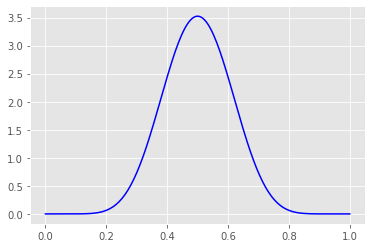

In [9]:
a, b = 10, 10
prior = stats.beta(a, b)

plt.plot(theta_grid, prior.pdf(theta_grid), label='Prior', c='blue')

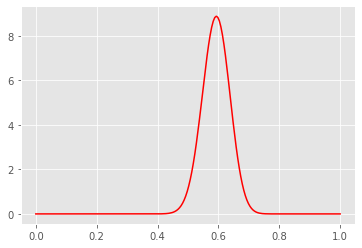

In [10]:
#create a posterior distribution

posterior = stats.beta(h+a, n-h+b)
ci = posterior.interval(0.95)

plt.plot(theta_grid, posterior.pdf(theta_grid), label='Posterior', c='red')

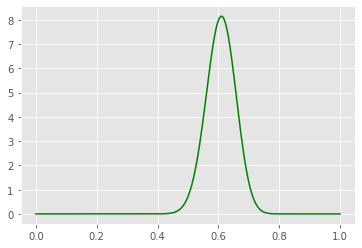

In [12]:
plt.plot(theta_grid, n*stats.binom(n, theta_grid).pmf(h), label='Likelihood', c='green')

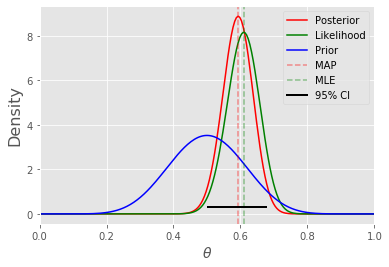

In [15]:
plt.plot(theta_grid, posterior.pdf(theta_grid), label='Posterior', c='red')
plt.plot(theta_grid, n*stats.binom(n, theta_grid).pmf(h), label='Likelihood', c='green')
plt.plot(theta_grid, prior.pdf(theta_grid), label='Prior', c='blue')

plt.axvline((h+a-1)/(n+a+b-2), c='red', linestyle='dashed', alpha=0.4, label='MAP')
plt.axvline(mu/n, c='green', linestyle='dashed', alpha=0.4, label='MLE')
plt.xlim([0, 1])
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

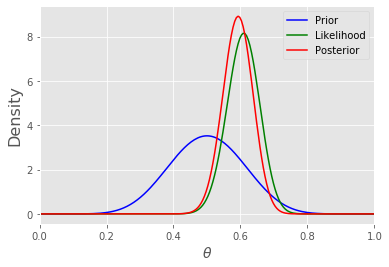

In [16]:
#thetas = np.linspace(0, 1, 200)
prior = stats.beta(a, b)

post = prior.pdf(theta_grid) * stats.binom(n, theta_grid).pmf(h)
post /= (post.sum() / len(theta_grid))

plt.plot(theta_grid, prior.pdf(theta_grid), label='Prior', c='blue')
plt.plot(theta_grid, n*stats.binom(n, theta_grid).pmf(h), label='Likelihood', c='green')
plt.plot(theta_grid, post, label='Posterior', c='red')
plt.xlim([0, 1])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

In [21]:
##Use Markov Chain Monte Carlo

def target(likelihood, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return likelihood(n, theta).pmf(h)*prior.pdf(theta)

    

In [20]:
n = 100
h = 61
a = 10
b = 10

likelihood = stats.binom
prior = stats.beta(a, b)
sigma = 0.3

naccept = 0
theta = 0.1
niters = 10000
samples = np.zeros(niters+1)
samples[0] = theta


for i in range(niters):
    theta_p = theta + stats.norm(0, sigma).rvs()
    print(theta_p)
    rho = min(1, target(lik, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
    u = np.random.uniform()
    
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta
nmcmc = len(samples)//2
print("Efficiency = ", naccept/niters)

Efficiency =  0.1836


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


NameError: name 'thetas' is not defined

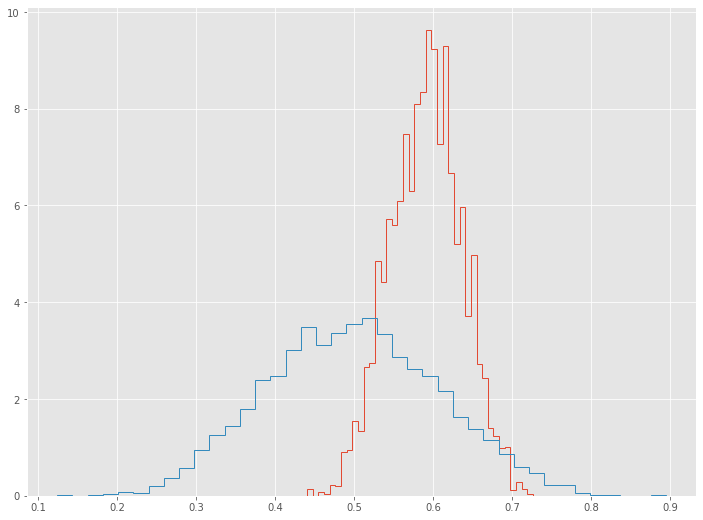

In [19]:
post = stats.beta(h+a, n-h+b)

plt.figure(figsize=(12, 9))
plt.hist(samples[nmcmc:], 40, histtype='step', normed=True, 
         linewidth=1, label='Distribution of prior samples');
plt.hist(prior.rvs(nmcmc), 40, histtype='step', normed=True, 
         linewidth=1, label='Distribution of posterior samples');
plt.plot(thetas, post.pdf(thetas), c='red', 
         linestyle='--', alpha=0.5, label='True posterior')
plt.xlim([0,1]);
plt.legend(loc='best');